# BBC News Articles

## Task 1: Exploratory Data Analytics
###### (a) Load the dataset and construct a feature vector for each article in the entire dataset. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.
###### (b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii) class distribution.

Setup

In [75]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import random
import matplotlib.pyplot as plt

Import Data

In [76]:
df = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
df.head()

,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment


Vectorize Data

In [77]:
articles_text = df["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1 = vector1.toarray()
v1_names = vectorizer1.get_feature_names_out()

vector1_sample = vectorizer1_sample.transform(random_sample)
vector1_sample = vector1_sample.toarray()
v1_sample_names = vectorizer1_sample.get_feature_names_out()

#map sample to feature names
v1_sample_df = pd.DataFrame(data=zip(v1_sample_names, vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4], sum([vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4]])), columns=['Features', 'Article 1', 'Article 2', 'Article 3', 'Article 4', 'Article 5', 'Total'])

v1_df = pd.DataFrame(data=vector1, columns = v1_names)

v1_df_emily = pd.DataFrame(data=vector1, columns = v1_names)


# summarize encoded vector
print("Method 1")
print(f'article vector\n {vector1}')
print('\nArticles:', vector1.shape[0], ', Extracted Features:', vector1.shape[1])
print(f'\narticle vector (5 articles)\n {vector1_sample}')

v1_sample_df.head(vector1_sample.shape[1])


## APPROACH TWO ## MAYBE DELETE IF NOT USED????
#vectorizer2 = TfidfVectorizer()
#vectorizer2.fit(articles_text)

#vectorizer2_sample = TfidfVectorizer()
#vectorizer2_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
#vector2 = vectorizer2.transform(articles_text)
#vector2_sample = vectorizer2_sample.transform(random_sample)

# summarize encoded vector
#print('\n', "Method 2")
#print(f'article vector\n {vector2.toarray()}')
#print(f'\narticle vector (5 articles)\n {vector2_sample.toarray()}')
#print('\nArticles:', vector2.shape[0], ', Extracted Features:', vector2.shape[1])

Method 1
article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Articles: 428 , Extracted Features: 13518

article vector (5 articles)
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]]


,Features,Article 1,Article 2,Article 3,Article 4,Article 5,Total
0,000,0,0,1,0,0,1
1,0530,0,0,1,0,0,1
2,0630,0,0,1,0,0,1
3,100,1,0,0,0,0,1
4,11,0,0,0,1,0,1
...,...,...,...,...,...,...,...
773,xp,0,0,2,0,0,2
774,year,2,1,0,3,1,7
775,years,0,0,0,1,0,1
776,yet,0,0,0,1,0,1


Plot Data Top 50

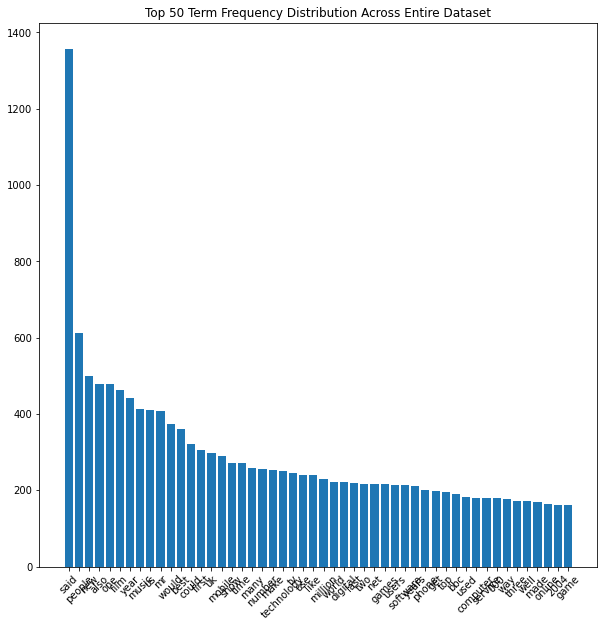

In [121]:
#find top 50 terms

totals = []
for column in v1_df:
    totals.append(v1_df[column].sum())

feature_totals = pd.DataFrame(data=zip(v1_names, totals), columns=['Terms', 'Total'])
top_50_features = feature_totals.sort_values(by='Total', ascending=False)
top_50_features = top_50_features.head(50)

#plot top 50 distribution
x = top_50_features['Terms']
y = top_50_features['Total']
plt.figure(figsize=(10, 10))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Entire Dataset')
plt.show()

Extract Data by Article Category

In [86]:
#split dataframe based on class
tech_df = df[df.Category == 'tech']
entertainment_df = df[df.Category == 'entertainment']

#same methods as question (a)
tech_text = tech_df["Text"].to_numpy()
entertainment_text = entertainment_df["Text"].to_numpy()

vectorizer_tech = CountVectorizer()
vectorizer_tech.fit(tech_text)
vectorizer_entertainment = CountVectorizer()
vectorizer_entertainment.fit(entertainment_text)

vector_tech = vectorizer_tech.transform(tech_text)
vector_tech = vector_tech.toarray()
tech_names = vectorizer_tech.get_feature_names_out()
vector_entertainment = vectorizer_entertainment.transform(entertainment_text)
vector_entertainment = vector_entertainment.toarray()
entertainment_names = vectorizer_entertainment.get_feature_names_out()

vector_tech_df = pd.DataFrame(data=vector_tech, columns = tech_names)
vector_entertainment_df = pd.DataFrame(data=vector_entertainment, columns = entertainment_names)

#find term frequency for tech articles
totals = []
for column in vector_tech_df:
    totals.append(vector_tech_df[column].sum())

tech_totals = pd.DataFrame(data=zip(tech_names, totals), columns=['Terms', 'Total'])
tech_totals = tech_totals.sort_values(by='Total', ascending=False)
print("Technology:")
print(tech_totals.head())

#find term frequency for entertainment articles
totals = []
for column in vector_entertainment_df:
    totals.append(vector_entertainment_df[column].sum())

entertainment_totals = pd.DataFrame(data=zip(entertainment_names, totals), columns=['Terms', 'Total'])
entertainment_totals = entertainment_totals.sort_values(by='Total', ascending=False)
print("\nEntertainment:")
print(entertainment_totals.head())


Technology:
       Terms  Total
6995    said    892
5860  people    507
5417     new    304
5211  mobile    290
5301      mr    288

Entertainment:
      Terms  Total
6622   said    465
3110   film    420
1035   best    324
8423   year    241
5107  music    210


Plot Technology Articles Frequency

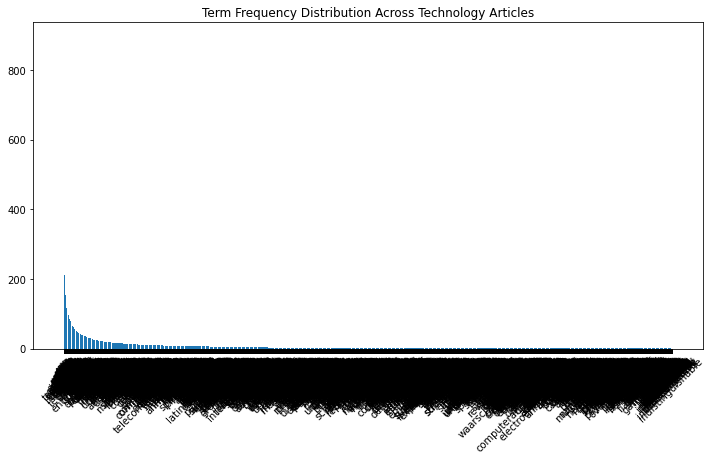

In [81]:
x = tech_totals['Terms']
y = tech_totals['Total']
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Term Frequency Distribution Across Technology Articles')
plt.show()

Technology Articles Top 50

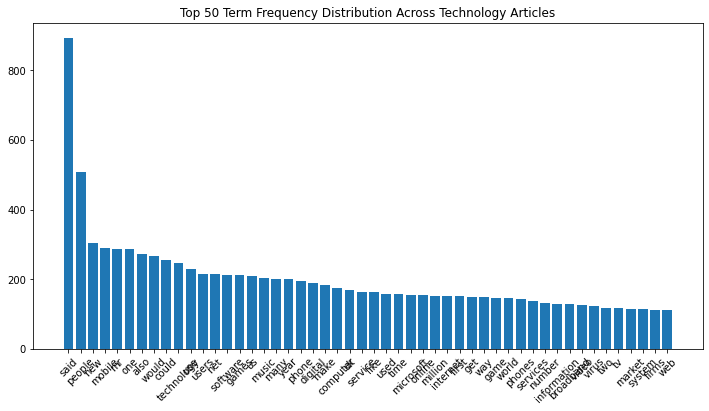

In [82]:
tech_top_50 = tech_totals.head(50)
x = tech_top_50['Terms']
y = tech_top_50['Total']
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Technology Articles')
plt.show()

Plot Entertainment Articles Frequency

In [ ]:
x = entertainment_totals['Terms']
y = entertainment_totals['Total']
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Term Frequency Distribution Across Entertainment Articles')
plt.show()

Entertainment Articles Top 50

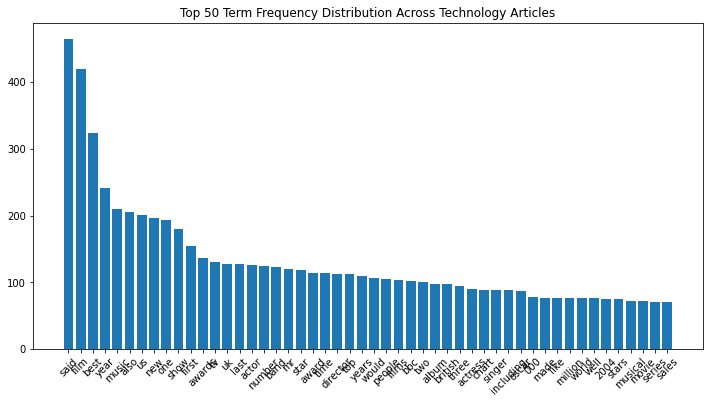

In [84]:
entertainment_top_50 = entertainment_totals.head(50)

x = entertainment_top_50['Terms']
y = entertainment_top_50['Total']
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Technology Articles')
plt.show()

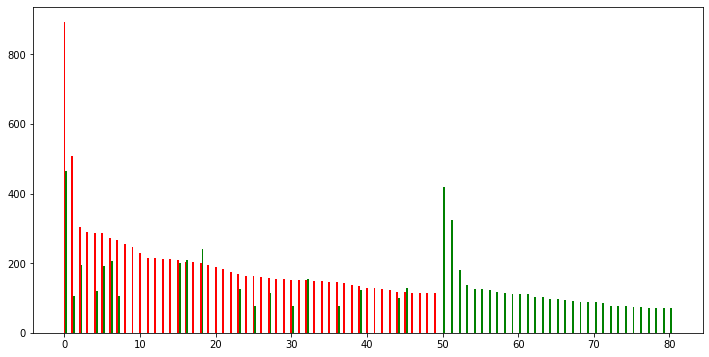

In [117]:
#X_axis = np.arrange(len(tech_top_50)+len(entertainment_top_50))

top_50_comp = tech_top_50
top_50_comp = top_50_comp.reindex(columns = top_50_comp.columns.to_list() + ['Ent'])
top_50_comp.columns = ['Term', 'Tech', 'Ent']

for index, row in entertainment_top_50.iterrows():
    if row[0] in top_50_comp.values:
        top_50_comp.loc[top_50_comp.Term == row[0], 'Ent'] = row[1]
    else:
        top_50_comp.loc[top_50_comp.shape[0]] = [row[0], 0, row[1]]
top_50_comp['Ent'] = top_50_comp['Ent'].fillna(0)

x = top_50_comp['Tech']
y = top_50_comp['Ent']


N = 81
ind = np.arange(N) 
width = 0.25

plt.figure(figsize=(12, 6))
bar1 = plt.bar(ind, x, width, color = 'r')
bar2 = plt.bar(ind+width, y, width, color='g')

#plt.figure(figsize=(12, 6))
#plt.plot(x, y, kind='bar')
plt.show()

#plt.figure(figsize=(12, 6))

#x_tech = tech_top_50['Terms']
#x_ent = entertainment_top_50['Terms']

#y_tech = tech_top_50['Total']
#y_ent = entertainment_top_50['Total']


#plt.bar(x_tech, height = 10, label = 'Technology', color = 'blue')
#plt.bar(x_ent, height = 10, label = 'Entertainment', color = 'orange')

#plt.xticks(rotation = 45)
#plt.title('Top 50 Term Frequency Distribution Across Technology/Entertainment Articles')
#plt.show()

## Task 2: Classification Models Learning

### Logistic Regression
###### Train your logistic regression classifier with L2-regularization. Consider different values of the regularization term λ. Describe the effect of the regularization parameter λ on the outcome in terms of bias and variance. Report the plot generated for specific λ values with training loss on the y-axis versus λ on the x-axis to support your claim.

In [ ]:
# Matthew Young



### Naive Bayes
###### Train a Naive Bayes classifier using all articles features. Report the (i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB classifier, and (ii) the top-20 words that maximize the following quantity 𝑃(𝑋𝑤=1|𝑌=𝑦)/𝑃(𝑋𝑤=1|𝑌≠𝑦). Which list of words describe the two classes better? Briefly explain your reasoning. - She's going to change some stuff and make an announcement


In [25]:
# Emily

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# X_train is vectorised features, Y_train is the classes of each row / target variable
X_train = vector1
target_col = df["Category"]
Y_train = target_col.to_numpy()

NB_clf = MultinomialNB()
NB_clf.fit(X_train, Y_train)

# Training accuracy
train_acc = NB_clf.score(X_train, Y_train)

print(train_acc)

# Testing accuracy
#Y_pred = NB_clf.predict(X_test)
#print("Test Accuracy:",metrics.accuracy_score(Y_Test, Y_pred))

####EMILY HERE IS YOUR DATAFRAME#####
v1_df_emily

0.9953271028037384


,00,000,000th,001st,0051,007,0100,0130,028,05,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### (i)

In [26]:
# Df for grouping - vectorsied df with target df 
count_df = pd.concat([v1_df_emily,target_col], axis=1)

# Grouped data by category
grouped = count_df.groupby(count_df.Category)

# Split data into df of each category
# dropped category column for sum
tech_df = grouped.get_group("tech")
tech_df = tech_df.drop("Category", axis=1)

ent_df = grouped.get_group("entertainment")
ent_df = ent_df.drop("Category", axis=1)

# Summed each colum in each df
sum_tech_series = tech_df.sum()
sum_ent_series = ent_df.sum()

# Sorting each series to get top 20
sorted_tech = sum_tech_series.sort_values(ascending = False)
top_20_tech = sorted_tech[:20]
print("Top 20 Tech:")
print(top_20_tech)

sorted_ent = sum_ent_series.sort_values(ascending = False)
top_20_ent = sorted_ent[:20]
print("Top 20 Entertainment:")
print(top_20_ent)

Top 20 Tech:
said          892
people        507
new           304
mobile        290
mr            288
one           286
also          273
would         267
could         255
technology    247
use           228
users         214
net           214
software      213
games         212
us            210
music         203
many          202
year          201
phone         196
dtype: int64
Top 20 Entertainment:
said      465
film      420
best      324
year      241
music     210
also      206
us        201
new       196
one       193
show      180
first     155
awards    137
tv        130
last      127
uk        127
actor     126
number    124
band      123
mr        120
star      118
dtype: int64


#### (ii)

In [28]:
# Will break since some words are in an article multiple times (prob can't be more than one)
#total_tech = tech_df.shape[0]
#prob_word_given_tech = sum_tech_series / total_tech
#total_ent = ent_df.shape[0]
#prob_word_given_ent = sum_ent_series / total_ent

# word in tech / word not in tech - with smoothing
tech_series = (sum_tech_series + 1) / (sum_ent_series + 2)

# word in entertainment / word not in entertainment - with smoothing
ent_series = (sum_ent_series + 1) / (sum_tech_series + 2)

# Sorting each series to get top 20
sorted_tech2 = tech_series.sort_values(ascending = False)
top_20_tech2 = sorted_tech2[:20]
print("Top 20 Tech:")
print(top_20_tech2)

sorted_ent2 = ent_series.sort_values(ascending = False)
top_20_ent2 = sorted_ent2[:20]
print("Top 20 Entertainment:")
print(top_20_ent2)

Top 20 Tech:
users         107.500000
software      107.000000
mobile         97.000000
microsoft      77.500000
broadband      64.500000
virus          61.500000
firms          57.000000
pc             54.500000
net            53.750000
technology     49.600000
phones         48.333333
spam           42.500000
gadget         36.000000
games          35.500000
consumer       34.500000
mobiles        34.000000
gadgets        33.500000
windows        33.500000
machines       33.500000
phone          32.833333
dtype: float64
Top 20 Entertainment:
actress        45.500000
singer         45.000000
oscar          44.000000
band           41.333333
stars          38.000000
album          33.000000
aviator        31.500000
chart          30.000000
nominated      27.500000
rock           26.500000
festival       26.500000
actor          25.400000
nominations    24.000000
charles        23.500000
foxx           22.000000
comedy         21.666667
oscars         21.500000
starring       21.000000


Difference - there is a difference just by looking at them, the top20 words from (ii) look to be more relevent than the top20 words from (i). So (ii) seems to be the better formula.

### Soft Value Margin (SVM)
###### Train your SVM classification models on the training dataset. You need to report two surface plots for: (i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶), and (ii) the hard-margin RBF kernel with your choice of kernel width (σ). Explain the impact of penalty 𝐶 on the soft-margin decision boundaries, as well as the kernel hyperparameter on the hard-margin decision boundaries.

In [ ]:
# Humza

### Nearest Neighbor
###### Consider the neural network with the following hyperparameters: the initial weights uniformly drawn in range [0,0.1] with learning rate 0.01.
######  ● Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn]T , the hidden layer has x nodes z = [z1, ..., zx]T , and the output layer is a probability distribution y = [y1, y2]T over two classes.
######  ● Plot the average training cross-entropy loss as shown below on the y-axis versus the number of hidden units on the x-axis. Explain the effect of numbers of hidden units. 𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝐿𝑜𝑠𝑠 =− 𝑖=1 2 Σ 𝑦𝑖 log(𝑦𝑖 ^ )